In [ ]:
Pkg.add("Graphs")
Pkg.add("GraphLayout")

In [12]:
using Plots
pyplot(size=(500,300))
import Graphs, GraphLayout

In [13]:
n = 5
g = Graphs.simple_graph(n)
for (i,j) in [(1,2),(2,3),(1,3),(2,4),(3,5)]
    Graphs.add_edge!(g, i, j)
end

In [14]:
am = Graphs.adjacency_matrix(g)

5x5 Array{Bool,2}:
 false   true   true  false  false
 false  false   true   true  false
 false  false  false  false   true
 false  false  false  false  false
 false  false  false  false  false

In [4]:
x, y = GraphLayout.layout_spring_adj(am)

([0.052086460387572364,-0.3342146774168322,0.3672453741159285,-1.0,1.0],[1.0,-0.16601740453784009,-0.33155139142758694,-0.5332447092524314,-1.0])

In [5]:
function graph_edge_lists(x, y)
    edgex, edgey = zeros(0), zeros(0)
    for i=1:n, j=1:n
        if am[i,j]
            append!(edgex, [x[i], x[j], NaN])
            append!(edgey, [y[i], y[j], NaN])
        end
    end
    edgex, edgey
end

graph_edge_lists (generic function with 1 method)

In [10]:
edgex, edgey = graph_edge_lists(x, y)

([0.052086460387572364,-0.3342146774168322,NaN,0.052086460387572364,0.3672453741159285,NaN,-0.3342146774168322,0.3672453741159285,NaN,-0.3342146774168322,-1.0,NaN,0.3672453741159285,1.0,NaN],[1.0,-0.16601740453784009,NaN,1.0,-0.33155139142758694,NaN,-0.16601740453784009,-0.33155139142758694,NaN,-0.16601740453784009,-0.5332447092524314,NaN,-0.33155139142758694,-1.0,NaN])

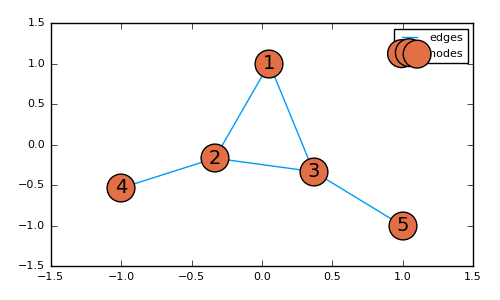

In [11]:
with(leg=:best, grid=false) do
    plot(edgex, edgey, lab="edges")
    scatter!(x, y, m=20, lab="nodes", ann=map(text,1:n))
end

[Plots.jl] Initializing backend: pyplot
n = 4
source = [1,2,2,3,4]
destiny = [2,3,4,4,1]
weights = 1.0:1.0:5.0
x = [0.45704230658906037,0.619705900077711,2.151693446660977,-2.3558319986163956]
y = [3.0,1.0,3.0,1.0]
z = nothing
weights = 1.0:1.0:5.0


INFO: converged. numiter=10 last=1.0132016233513697 this=1.0132515284545873



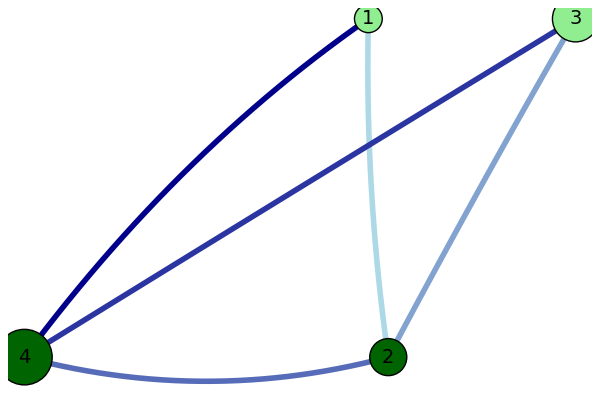

lz = [1.0,2.0,3.0,4.0,5.0]


/home/tom/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [1]:
using PlotRecipes; pyplot()
s = [1,2,2,3,4]
d = [2,3,4,4,1]
w = 1.:length(s)
n = max(maximum(s), maximum(d))

graphplot(s,d,w, m=(linspace(20,40,n),:greens), l=(4,:blues), series_annotations=map(string,1:n), func=:tree)

In [22]:
using PlotRecipes; pyplot(size=(300,300))
s = [1,2,2,3,4,5]
d = [2,3,4,4,5,1]
w = 1.:length(s)
# w = ones(length(s))
n = max(maximum(s), maximum(d))

5

In [3]:
using PlotRecipes; gr(size=(500,500))
n = 10
s, d = Plots.unzip(unique([(rand(1:n),rand(1:n)) for i=1:20]))
s = convert(Vector{Int}, s)
d = convert(Vector{Int}, d)
w = 4ones(length(s));

basex, basey = rand(n), rand(n)
# x, y = PlotRecipes.tree_graph(s,d,w, x=copy(basex),y=copy(basey),maxiter=10)
# graphplot(s,d,w,func=:tree,direction=:left,series_annotations=map(string,1:n))

layers = rand(1:4, n)
@gif for i=1:50
    x, y = PlotRecipes.tree_graph(s,d,w, x=copy(basex),y=copy(basey),maxiter=i,layers=layers)
    graphplot(s,d,w, m=(linspace(20,40,n),:inferno), l=(3,:black), x=x, y=y, series_annotations=map(string,1:n), curves=false)
end

outdeg = [4,1,2,2,2,2,1,2,1,2]
indeg = [0,1,1,4,2,3,3,2,0,3]
netdeg = [4,-4,-3,-18,-8,-13,-14,-8,1,-13]
idxs = [1,9,3,2,5,8,6,10,7,4]


INFO: converged. numiter=63 last=0.27069980016830764 this=0.27072601605547214


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 - 
 
 
 8 
 
 
 - 
 
 
 6 
 
 
 - 
 
 
 4 
 
 
 - 
 
 
 2 
 
 
 0 
 
 
 
 - 
 
 
 2 
 
 
 0 
 
 
 2 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 202.815,268.03 201.79,273.06 200.735,278.084 199.649,283.102 198.533,288.116 197.387,293.123 196.21,298.125 195.003,303.121 193.766,308.112 192.498,313.098 
 191.199,318.078 189.87,323.052 188.511,328.021 187.122,332.984 185.702,337.942 184.251,342.894 182.771,347.841 181.259,352.782 179.718,357.717 178.146,362.648 
 176.544,367.572 174.911,372.491 173.248,377.405 171.554,382.313 169.83,387.215 168.076,392.112 166.291,397.003 164.476,401.889 162.63,406.77 160.754,411.644 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 468.058,315.902 467.477,310.844 466.848,305.794 466.171,300.752 465.446,295.717 464.674,290.69 463.853,285.67 462.985,280.657 462.069,275.653 461.105,270.655 
 460.093,265.665 459.033,260.683 457.925,255.708 456.769,250.741 455.566,245.781 454.314,240.829 453.015,235.885 451.668,230.947 450.273,226.018 448.83,221.096 
 447.339,216.181 445.801,211.274 444.214,206.374 442.58,201.482 440.897,196.598 439.167,191.72 437.389,186.851 435.563,181.989 433.689,177.134 431.768,172.287 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 351.363,76.5447 346.712,88.7788 341.923,100.964 336.997,113.101 331.934,125.19 326.734,137.23 321.396,149.222 315.922,161.165 310.31,173.059 304.56,184.906 
 298.674,196.703 292.65,208.452 286.489,220.153 280.191,231.805 273.755,243.409 267.183,254.964 260.473,266.471 253.626,277.929 246.641,289.339 239.519,300.7 
 232.26,312.012 224.864,323.277 217.331,334.492 209.66,345.659 201.852,356.778 193.907,367.848 185.825,378.87 177.605,389.843 169.249,400.768 160.754,411.644 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 468.058,315.902 454.561,311.035 441.021,306.28 427.439,301.636 413.815,297.105 400.148,292.685 386.44,288.377 372.689,284.181 358.896,280.097 345.061,276.125 
 331.183,272.264 317.264,268.516 303.302,264.879 289.299,261.354 275.253,257.94 261.164,254.639 247.034,251.449 232.861,248.371 218.647,245.405 204.39,242.551 
 190.091,239.809 175.749,237.178 161.366,234.659 146.94,232.252 132.473,229.957 117.963,227.774 103.41,225.702 88.8161,223.743 74.1795,221.895 59.5008,220.159 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 348.113,363.773 341.728,365.609 335.339,367.432 328.943,369.242 322.543,371.039 316.137,372.822 309.725,374.592 303.308,376.349 296.886,378.093 290.458,379.823 
 284.024,381.54 277.586,383.244 271.141,384.934 264.692,386.611 258.236,388.275 251.776,389.926 245.31,391.564 238.838,393.188 232.361,394.799 225.879,396.396 
 219.391,397.981 212.898,399.552 206.399,401.11 199.895,402.655 193.385,404.186 186.87,405.704 180.349,407.209 173.823,408.701 167.291,410.179 160.754,411.644 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 269.659,459.516 276.536,454.594 283.41,449.67 290.282,444.744 297.151,439.816 304.018,434.885 310.882,429.953 317.744,425.018 324.603,420.081 331.459,415.142 
 338.314,410.2 345.165,405.257 352.014,400.311 358.86,395.363 365.704,390.413 372.546,385.461 379.385,380.507 386.221,375.55 393.055,370.591 399.886,365.631 
 406.714,360.667 413.541,355.702 420.364,350.735 427.185,345.765 434.004,340.793 440.82,335.819 447.633,330.843 454.444,325.865 461.252,320.884 468.058,315.902 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 59.5008,220.159 73.8623,222.736 88.2043,225.364 102.527,228.045 116.83,230.777 131.113,233.561 145.377,236.397

In [3]:
using PlotRecipes; gr(size=(500,500))
s = [1,2,2,3,3,2,5,4,7]
d = [2,3,4,5,6,7,6,5,4]
w = ones(length(s))
n = max(maximum(s), maximum(d))

graphplot(s,d,w,func=:tree,series_annotations=map(string,1:n),root=:top)

dist = [0.0 1.0 2.0 2.0 3.0 3.0 2.0
 1.0 0.0 1.0 1.0 2.0 2.0 1.0
 2.0 1.0 0.0 2.0 1.0 1.0 2.0
 2.0 1.0 2.0 0.0 1.0 2.0 1.0
 3.0 2.0 1.0 1.0 0.0 1.0 2.0
 3.0 2.0 1.0 2.0 1.0 0.0 3.0
 2.0 1.0 2.0 1.0 2.0 3.0 0.0]


INFO: converged. numiter=78 last=8.36881038844636e-6 this=8.36959291080617e-6


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 - 
 
 
 4 
 
 
 - 
 
 
 2 
 
 
 0 
 
 
 
 0 
 
 
 0.5 
 
 
 1.0 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 233.283,28.6733 233.353,31.6605 233.479,34.6465 233.663,37.6314 233.903,40.6152 234.201,43.5978 234.555,46.5793 234.966,49.5597 235.434,52.5389 235.959,55.517 
 236.541,58.494 237.18,61.4699 237.876,64.4446 238.628,67.4182 239.438,70.3906 240.304,73.362 241.228,76.3322 242.208,79.3012 243.246,82.2692 244.34,85.236 
 245.491,88.2016 246.699,91.1662 247.964,94.1296 249.286,97.0919 250.665,100.053 252.101,103.013 253.593,105.972 255.143,108.93 256.749,111.886 258.413,114.842 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 258.413,114.842 249.781,117.534 241.276,120.247 232.898,122.979 224.646,125.731 216.521,128.504 208.522,131.296 200.65,134.108 192.905,136.94 185.286,139.792 
 177.794,142.663 170.429,145.555 163.19,148.467 156.077,151.398 149.092,154.349 142.233,157.321 135.5,160.312 128.895,163.323 122.415,166.354 116.063,169.405 
 109.837,172.476 103.738,175.567 97.7648,178.678 91.9186,181.808 86.1991,184.959 80.6062,188.129 75.14,191.32 69.8003,194.53 64.5873,197.76 59.5008,201.01 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 258.413,114.842 260.399,120.78 262.368,126.718 264.32,132.656 266.255,138.595 268.173,144.534 270.074,150.474 271.957,156.414 273.823,162.354 275.672,168.295 
 277.504,174.236 279.319,180.177 281.116,186.119 282.897,192.061 284.66,198.003 286.406,203.946 288.135,209.888 289.847,215.832 291.541,221.776 293.219,227.72 
 294.879,233.664 296.522,239.609 298.148,245.554 299.757,251.499 301.348,257.445 302.923,263.391 304.48,269.337 306.02,275.284 307.543,281.231 309.049,287.179 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 59.5008,201.01 63.0575,206.927 66.556,212.846 69.9963,218.767 73.3784,224.689 76.7024,230.614 79.9682,236.54 83.1758,242.468 86.3253,248.398 89.4166,254.33 
 92.4497,260.263 95.4246,266.198 98.3414,272.136 101.2,278.075 104,284.015 106.743,289.958 109.427,295.903 112.053,301.849 114.62,307.797 117.13,313.747 
 119.581,319.699 121.975,325.652 124.31,331.608 126.587,337.565 128.805,343.524 130.966,349.485 133.068,355.448 135.113,361.413 137.099,367.379 139.026,373.347 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 59.5008,201.01 62.6871,209.905 65.7568,218.801 68.7099,227.698 71.5464,236.597 74.2663,245.497 76.8696,254.399 79.3562,263.301 81.7263,272.206 83.9797,281.111 
 86.1166,290.018 88.1368,298.927 90.0404,307.837 91.8274,316.748 93.4978,325.661 95.0516,334.575 96.4888,343.49 97.8094,352.407 99.0134,361.325 100.101,370.244 
 101.071,379.165 101.926,388.088 102.663,397.011 103.284,405.936 103.788,414.863 104.176,423.791 104.447,432.72 104.602,441.65 104.64,450.582 104.561,459.516 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 258.413,114.842 264.901,117.936 271.442,121.021 278.036,124.098 284.683,127.166 291.383,130.225 298.136,133.275 304.942,136.317 311.8,139.349 318.712,142.373 
 325.676,145.388 332.694,148.395 339.764,151.393 346.888,154.381 354.064,157.361 361.293,160.333 368.575,163.295 375.91,166.249 383.298,169.194 390.739,172.13 
 398.233,175.058 405.779,177.977 413.379,180.886 421.032,183.788 428.737,186.68 436.495,189.564 444.307,192.438 452.171,195.304 460.088,198.162 468.058,201.01 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#da6f93; stroke-width:1; stroke-opacity:1; fill:none" points="
 139.026,373.347 139.802,376.372 140.436,379.393 140.931,382.41 141.285,385.424 141.499,388.433 141.573,391.439 141.507,394.441 141.3,397.439 140.953,400.4

In [4]:
png("/tmp/tmp")